In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_full copy.csv') 

In [3]:
data.shape

(6953, 8)

In [4]:
data['description'].describe()

count                                                  6953
unique                                                 6708
top       Note: By applying to this position your applic...
freq                                                      9
Name: description, dtype: object

In [5]:
data.isnull().any()

Unnamed: 0     False
position       False
company        False
reviews         True
location       False
state          False
zip_code        True
description    False
dtype: bool

In [6]:
data.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
0,0,Development Director,ALS TDI,NaN,Atlanta,GA,30301.0,Development Director\nALS Therapy Development ...
1,1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,NaN,Atlanta,GA,NaN,"Job Description\n\n""The road that leads to acc..."
2,2,Data Scientist,Xpert Staffing,NaN,Atlanta,GA,NaN,"Growing company located in the Atlanta, GA are..."
3,3,Data Analyst,Operation HOPE,44.0,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,4,Assistant Professor -TT - Signal Processing & ...,Emory University,550.0,Atlanta,GA,NaN,DESCRIPTION\nThe Emory University Department o...


In [7]:
# Group listings for data analysts 

data_analyst = data[data['position'].str.contains("Data Analyst|Data analyst|data analyst|Analyst|analyst]")] 

data_analyst.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
3,3,Data Analyst,Operation HOPE,44.0,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
8,8,Analyst - CIB Credit Research,SunTrust,3343.0,Atlanta,GA,NaN,Works closely with senior CIB professionals. P...
14,14,Business Intelligence Data Science Analyst - S...,Newell Brands,912.0,Atlanta,GA,NaN,Data Science Analyst– Business Intelligence\nL...
57,57,Senior Research Analyst- Biotech,BNY Mellon,3254.0,Boston,MA,NaN,"About us: The Boston Company, Standish and Mel..."
64,64,Quantitative Analyst Fixed Income,Analytic Recruiting,2.0,Chicago,IL,NaN,Quantitative Analyst Fixed Income\nJob Descrip...


In [8]:
data_analyst.shape

(852, 8)

In [9]:
# Group listings for data scientists

data_scientist = data[data['position'].str.contains("Data Scientist|Data scientist|data scientist|Scientist|scientist")] 

data_scientist.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
1,1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,NaN,Atlanta,GA,NaN,"Job Description\n\n""The road that leads to acc..."
2,2,Data Scientist,Xpert Staffing,NaN,Atlanta,GA,NaN,"Growing company located in the Atlanta, GA are..."
7,7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,899.0,Atlanta,GA,NaN,Overview / Responsibilities\nWood Environment ...
9,9,Senior Associate - Cognitive Data Scientist Na...,KPMG,4494.0,Atlanta,GA,30338.0,Known for being a great place to work and buil...
11,11,Health Scientist III-CPTS,Chenega Corporation,390.0,Atlanta,GA,NaN,"Chenega Professional &amp; Technical Services,..."


In [10]:
data_scientist.shape

(2606, 8)

In [11]:
# Group listings for engineers

engineer = data[data['position'].str.contains("Engineer|engineer|Programmer|programmer|Developer|developer")] 

engineer.head()

,Unnamed: 0,position,company,reviews,location,state,zip_code,description
5,5,Manager of Data Engineering,McKinsey & Company,385.0,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree in Computer ...
7,7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,899.0,Atlanta,GA,NaN,Overview / Responsibilities\nWood Environment ...
16,16,Senior Structural Engineer-Transmission & Dist...,Burns & McDonnell,152.0,Atlanta,GA,30309.0,Description\nExecutes complex assignments requ...
17,17,Senior Mobile Developer (iOS/Android),Perficient,44.0,Atlanta,GA,30338.0,Overview\n\n\n\nAt Perficient you’ll deliver m...
20,20,Senior Electrical Engineer,Burns & McDonnell,152.0,Atlanta,GA,30309.0,Description\nBurns &amp; McDonnell is consider...


In [12]:
engineer.shape

(1500, 8)

In [13]:
# Create an array with the descriptions for each position

analyst_text = data_analyst.description.values
scientist_text = data_scientist.description.values
engineer_text = engineer.description.values


In [14]:
# Skills requirements

# Define a regex search function for Data Analyst

def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [15]:
# Create a data frame with skills name and regex pattern to search with

# Technical skills

tech_skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','Algorithm','Java','Visualization', 'PHP', 'Excel']

tech_skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
              "(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?', '(?i)\WPHP\W?', '(?i)\WExcel\W?']

tech_skill_df =pd.DataFrame(
    {"skill": tech_skills,
     "regex_pattern":tech_skill_patt})

In [16]:
# Iterate through the list of skills using the search function created

i = []
for x in tech_skill_df['regex_pattern']:
    i.append(count_text(x,analyst_text))
tech_skill_df['count'] = i
tech_skill_df['Analyst'] = round(tech_skill_df['count']/len(analyst_text),2)
tech_skill_df
tech_skill_df

,skill,regex_pattern,count,Analyst
0,R,\WR\W+\s*,284,0.33
1,Python,(?i)\WPython\W,242,0.28
2,Hadoop,(?i)\WHadoop\W?,33,0.04
3,SQL,(?i)SQL\w*,303,0.36
4,Tableau,(?i)\WTableau\W?,131,0.15
5,TensorFlow,(?i)\WTensorFlow\W?,1,0.00
6,Agile,(?i)\WAgile\W?,30,0.04
7,Power BI,(?i)\WPower\s?BI\W?,19,0.02
8,Algorithm,(?i)\WAlgorithms?\W?,69,0.08
9,Java,(?i)Java\w*,76,0.09


In [17]:
i = []
for x in tech_skill_df['regex_pattern']:
    i.append(count_text(x,scientist_text))
tech_skill_df['count'] = i
tech_skill_df['Scientist'] = round(tech_skill_df['count']/len(scientist_text),2)
tech_skill_df

,skill,regex_pattern,count,Analyst,Scientist
0,R,\WR\W+\s*,1193,0.33,0.46
1,Python,(?i)\WPython\W,1388,0.28,0.53
2,Hadoop,(?i)\WHadoop\W?,463,0.04,0.18
3,SQL,(?i)SQL\w*,830,0.36,0.32
4,Tableau,(?i)\WTableau\W?,215,0.15,0.08
5,TensorFlow,(?i)\WTensorFlow\W?,224,0.00,0.09
6,Agile,(?i)\WAgile\W?,157,0.04,0.06
7,Power BI,(?i)\WPower\s?BI\W?,24,0.02,0.01
8,Algorithm,(?i)\WAlgorithms?\W?,911,0.08,0.35
9,Java,(?i)Java\w*,521,0.09,0.20


In [23]:
i = []
for x in tech_skill_df['regex_pattern']:
    i.append(count_text(x,engineer_text))
tech_skill_df['count'] = i
tech_skill_df['Engineer'] = round(tech_skill_df['count']/len(engineer_text),2)
tech_skill_df

,skill,regex_pattern,count,Analyst,Scientist,Engineer
0,R,\WR\W+\s*,286,0.33,0.46,0.19
1,Python,(?i)\WPython\W,811,0.28,0.53,0.54
2,Hadoop,(?i)\WHadoop\W?,322,0.04,0.18,0.21
3,SQL,(?i)SQL\w*,504,0.36,0.32,0.34
4,Tableau,(?i)\WTableau\W?,58,0.15,0.08,0.04
5,TensorFlow,(?i)\WTensorFlow\W?,134,0.00,0.09,0.09
6,Agile,(?i)\WAgile\W?,316,0.04,0.06,0.21
7,Power BI,(?i)\WPower\s?BI\W?,14,0.02,0.01,0.01
8,Algorithm,(?i)\WAlgorithms?\W?,478,0.08,0.35,0.32
9,Java,(?i)Java\w*,626,0.09,0.20,0.42


In [65]:
tech_skill_df.shape

(13, 6)

In [82]:
tech_skill_flat.shape

(39, 3)

<AxesSubplot:xlabel='skill'>

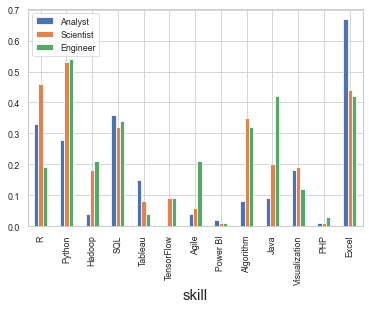

In [118]:
position= ["Analyst", "Scientist", "Engineer"]
tech_skill_df.plot(x='skill', y= position, kind="bar")


# Visualization: Technical skills 

In [121]:
#what did i do here is: i changed the format of the dataframe so seaborn can read the values and get
#rid of errors by changing the data structure
new_data= []
for index,row in tech_skill_df.iterrows():
    new_data.append(dict(skill=row['skill'], pct=row['Analyst']*100,position='Analyst'))
    new_data.append(dict(skill=row['skill'], pct=row['Scientist']*100,position='Scientist'))
    new_data.append(dict(skill=row['skill'], pct=row['Engineer']*100,position='Engineer'))

tech_skill_flat= pd.DataFrame.from_records(new_data)    

In [129]:
tech_skill_flat.head()

,skill,pct,position
0,R,33.0,Analyst
1,R,46.0,Scientist
2,R,19.0,Engineer
3,Python,28.0,Analyst
4,Python,53.0,Scientist


In [140]:
# filtering based on pct
tech_skill_flat= tech_skill_flat.sort_values(['pct'],ascending = False).reset_index(drop=True)

In [235]:
tech_skill_flat.head()

,skill,pct,position
0,Excel,67.0,Analyst
1,Python,54.0,Engineer
2,Python,53.0,Scientist
3,R,46.0,Scientist
4,Excel,44.0,Scientist


In [159]:
import seaborn as sns
import matplotlib.pyplot as plt


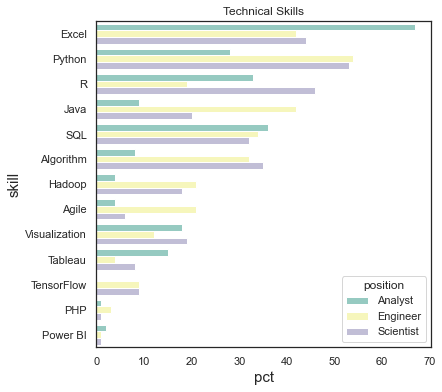

In [293]:
#sns.set_style("ticks")
sns.set_style("white") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
plt.figure(figsize=(6,6))

option1= sns.barplot(x= "pct", y="skill", hue= 'position', data=tech_skill_flat,
             palette="Set3")
plt.title('Technical Skills')
plt.show()

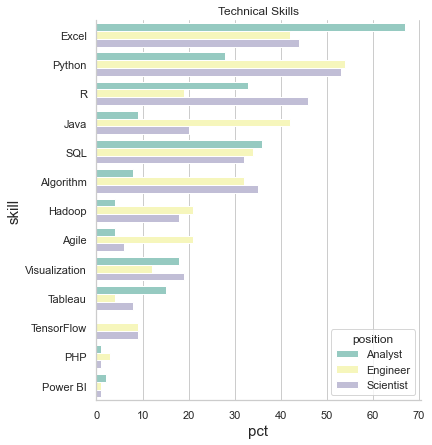

In [294]:
sns.set_style("whitegrid") #whitegrid,dark
#sns.set_style("ticks")
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
#plt.figure(figsize=(8,8))

option2= sns.factorplot(x= "pct", y="skill", hue= 'position', data=tech_skill_flat,
        size=6,kind= 'bar',palette="Set3",legend_out=False)
plt.title('Technical Skills')
plt.show()

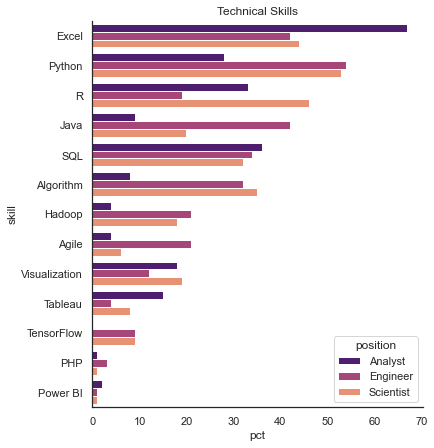

In [295]:
sns.set_style("white") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
#plt.figure(figsize=(8,8))
sns.set_context('notebook')

option3= sns.factorplot(x= "pct", y="skill", hue= 'position', data=tech_skill_flat,
             size=6, kind='bar', palette='magma', edgecolor = 'w', legend_out=False)
plt.title('Technical Skills')
plt.show()

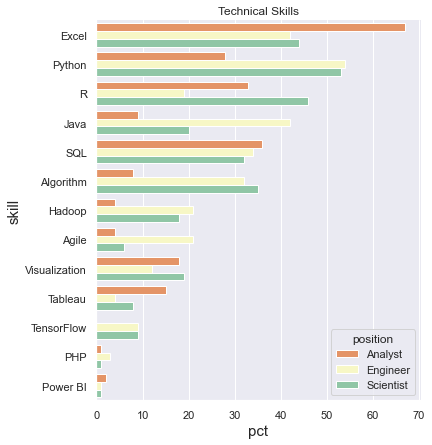

In [296]:
sns.set_style("darkgrid") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})

option4= sns.factorplot(x= "pct", y="skill", hue= 'position', data=tech_skill_flat,
             size=6, kind='bar', palette='Spectral', edgecolor = 'w', legend_out=False)
plt.title('Technical Skills')
plt.show()

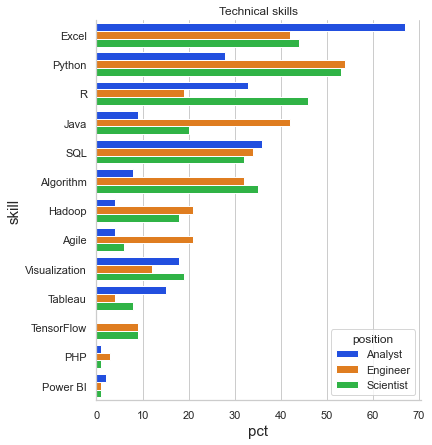

In [297]:
sns.set_style("whitegrid") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})

option5= sns.factorplot(x= "pct", y="skill", hue= 'position', data=tech_skill_flat,
             size=6, kind='bar', palette='bright', legend_out=False)
plt.title('Technical skills')
plt.show()

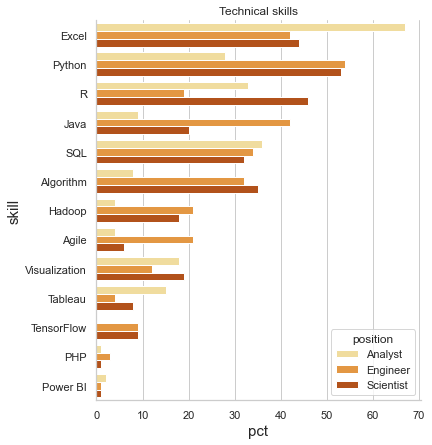

In [298]:
sns.set_style("whitegrid") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})

option6= sns.factorplot(x= "pct", y="skill", hue= 'position', data=tech_skill_flat,
             size=6, kind='bar', palette="YlOrBr", legend_out=False)
plt.title('Technical skills')
plt.show()

# Soft Skills

In [143]:
# Soft skills

soft_skills = ['Communication','Teamwork','Research', 'Work ethic', 'Problem solving', 'Independent', 'Presentation', 'Confidence', 'Leadership skills', 'Interpersonal skills', 'Time Management', 'Critical Thinking', 'Adaptability']

soft_skill_patt = ['(?i)\WCommunication\W','(?i)\WTeamwork\W','(?i)\WResearch\W', '(?i)\WWork ethic\W', '(?i)\WProblem solving\W', '(?i)\WIndependent\W', '(?i)\WPresentation\W', '(?i)\WConfidence\W', '(?i)\WLeadership skills\W', '(?i)\WInterpersonal skills\W', '(?i)\WTime Management\W', '(?i)\WCritical Thinking\W', '(?i)\WAdaptability\W']

soft_skill_df = pd.DataFrame(
    {"skill": soft_skills,
     "regex_pattern": soft_skill_patt})

In [144]:
# Iterate through the list of skills using the search function created
# Analyst
j = []
for x in soft_skill_df['regex_pattern']:
    j.append(count_text(x,analyst_text))
soft_skill_df['count'] = j
soft_skill_df['Analyst'] = round(soft_skill_df['count']/len(analyst_text),2)
soft_skill_df

,skill,regex_pattern,count,Analyst
0,Communication,(?i)\WCommunication\W,472,0.55
1,Teamwork,(?i)\WTeamwork\W,36,0.04
2,Research,(?i)\WResearch\W,585,0.69
3,Work ethic,(?i)\WWork ethic\W,26,0.03
4,Problem solving,(?i)\WProblem solving\W,110,0.13
5,Independent,(?i)\WIndependent\W,92,0.11
6,Presentation,(?i)\WPresentation\W,142,0.17
7,Confidence,(?i)\WConfidence\W,22,0.03
8,Leadership skills,(?i)\WLeadership skills\W,2,0.00
9,Interpersonal skills,(?i)\WInterpersonal skills\W,78,0.09


In [145]:
# Scientist

j = []
for x in soft_skill_df['regex_pattern']:
    j.append(count_text(x,scientist_text))
soft_skill_df['count'] = j
soft_skill_df['Scientist'] = round(soft_skill_df['count']/len(scientist_text),2)
soft_skill_df

,skill,regex_pattern,count,Analyst,Scientist
0,Communication,(?i)\WCommunication\W,1435,0.55,0.55
1,Teamwork,(?i)\WTeamwork\W,90,0.04,0.03
2,Research,(?i)\WResearch\W,1630,0.69,0.63
3,Work ethic,(?i)\WWork ethic\W,41,0.03,0.02
4,Problem solving,(?i)\WProblem solving\W,319,0.13,0.12
5,Independent,(?i)\WIndependent\W,227,0.11,0.09
6,Presentation,(?i)\WPresentation\W,361,0.17,0.14
7,Confidence,(?i)\WConfidence\W,58,0.03,0.02
8,Leadership skills,(?i)\WLeadership skills\W,40,0.00,0.02
9,Interpersonal skills,(?i)\WInterpersonal skills\W,182,0.09,0.07


In [146]:

j = []
for x in soft_skill_df['regex_pattern']:
    j.append(count_text(x,engineer_text))
soft_skill_df['count'] = j
soft_skill_df['Engineer'] = round(soft_skill_df['count']/len(engineer_text),2)
soft_skill_df

,skill,regex_pattern,count,Analyst,Scientist,Engineer
0,Communication,(?i)\WCommunication\W,716,0.55,0.55,0.48
1,Teamwork,(?i)\WTeamwork\W,55,0.04,0.03,0.04
2,Research,(?i)\WResearch\W,622,0.69,0.63,0.41
3,Work ethic,(?i)\WWork ethic\W,15,0.03,0.02,0.01
4,Problem solving,(?i)\WProblem solving\W,184,0.13,0.12,0.12
5,Independent,(?i)\WIndependent\W,72,0.11,0.09,0.05
6,Presentation,(?i)\WPresentation\W,128,0.17,0.14,0.09
7,Confidence,(?i)\WConfidence\W,20,0.03,0.02,0.01
8,Leadership skills,(?i)\WLeadership skills\W,28,0.00,0.02,0.02
9,Interpersonal skills,(?i)\WInterpersonal skills\W,92,0.09,0.07,0.06


<AxesSubplot:xlabel='skill'>

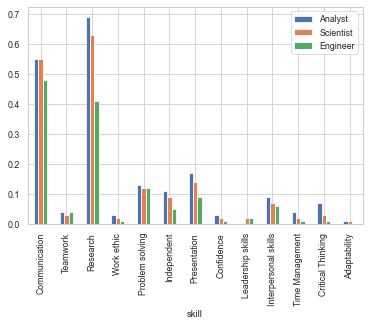

In [147]:
# Plot 

soft_skill_df.plot(x='skill', y= ["Analyst", "Scientist", "Engineer"], kind="bar")


# Visulaisation soft skills 

In [148]:
new_data= []
for index,row in soft_skill_df.iterrows():
    new_data.append(dict(skill=row['skill'], pct=row['Analyst']*100,position='Analyst'))
    new_data.append(dict(skill=row['skill'], pct=row['Scientist']*100,position='Scientist'))
    new_data.append(dict(skill=row['skill'], pct=row['Engineer']*100,position='Engineer'))

soft_skill_flat= pd.DataFrame.from_records(new_data)

In [149]:
soft_skill_flat.head()

,skill,pct,position
0,Communication,55.0,Analyst
1,Communication,55.0,Scientist
2,Communication,48.0,Engineer
3,Teamwork,4.0,Analyst
4,Teamwork,3.0,Scientist


In [150]:
# filtering based on pct
soft_skill_flat= soft_skill_flat.sort_values(['pct'],ascending = False).reset_index(drop=True)

In [151]:
soft_skill_flat.head()

,skill,pct,position
0,Research,69.0,Analyst
1,Research,63.0,Scientist
2,Communication,55.0,Analyst
3,Communication,55.0,Scientist
4,Communication,48.0,Engineer


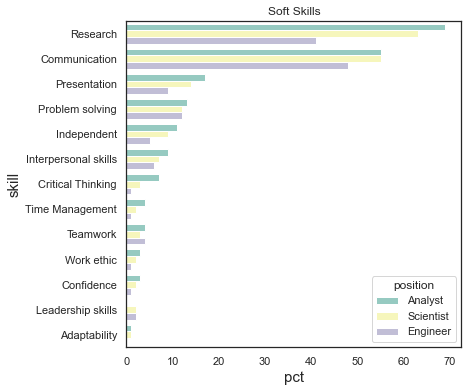

In [307]:
#sns.set_style("ticks")
sns.set_style("white") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
plt.figure(figsize=(6,6))

option_1= sns.barplot(x= "pct", y="skill", hue= 'position', data=soft_skill_flat,
              palette="Set3")
plt.title('Soft Skills')
plt.show()

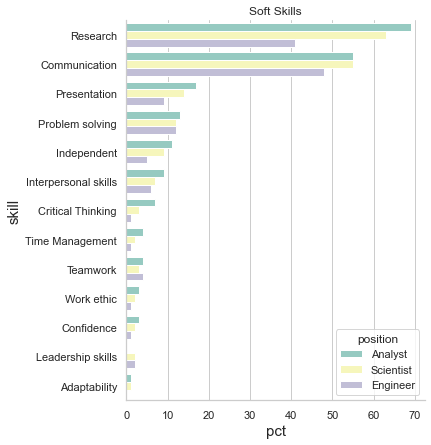

In [308]:
sns.set_style("whitegrid") #whitegrid,dark
#sns.set_style("ticks")
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
#plt.figure(figsize=(8,8))
option_2= sns.factorplot(x= "pct", y="skill", hue= 'position', data=soft_skill_flat,
        size=6,kind= 'bar',palette="Set3",legend_out=False)
plt.title('Soft Skills')
plt.show()

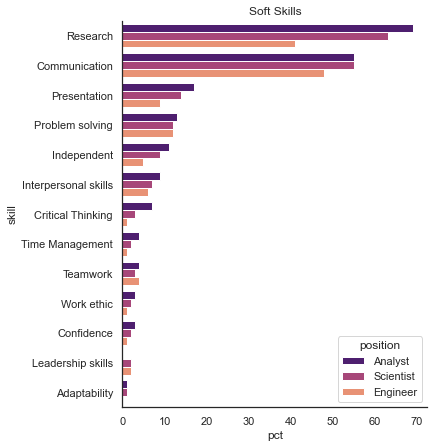

In [309]:
sns.set_style("white") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
#plt.figure(figsize=(8,8))
sns.set_context('notebook')

option_3= sns.factorplot(x= "pct", y="skill", hue= 'position', data=soft_skill_flat,
              size=6, kind='bar', palette='magma', edgecolor = 'w', legend_out=False)
plt.title('Soft Skills')
plt.show()

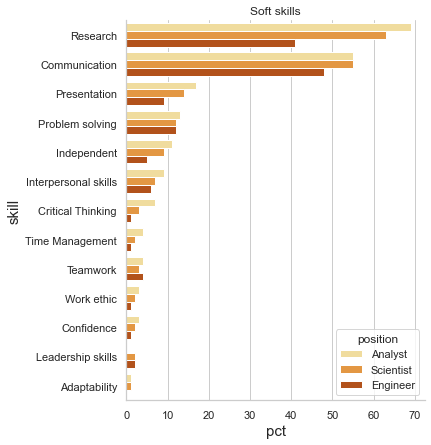

In [310]:
sns.set_style("whitegrid") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})

option_4= sns.factorplot(x= "pct", y="skill", hue= 'position', data=soft_skill_flat,
             size=6, kind='bar', palette="YlOrBr", legend_out=False)
plt.title('Soft skills')
plt.show()